In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [3]:
def EC_at_bifiltration(contributions, f1, f2):
    return sum([c[1] for c in contributions if (c[0][0] <= f1) and (c[0][1] <= f2)])


def EC_at_RGB_value(contributions, r, g, b):
    return sum(
        [
            c[1]
            for c in contributions
            if (c[0][0] <= r) and (c[0][1] <= g) and (c[0][2] <= b)
        ]
    )

## 2dim

In [6]:
contributions_df = pd.read_csv(
    "data/300_pts.csv", header=None, sep=" ", names=["x", "y", "c"]
)
contributions_df

,x,y,c
0,0.000000,0.100785,1
1,0.000000,0.104976,1
2,0.000000,0.108591,1
3,0.000000,0.108759,1
4,0.000000,0.109182,1
...,...,...,...
962,0.294193,0.376306,1
963,0.297262,0.294640,1
964,0.298320,0.376306,-1
965,0.299694,0.115780,-1


In [7]:
contributions_list = [((r[0], r[1]), r[2]) for r in contributions_df.values]
contributions_list[:5]

[((0.0, 0.1007853653378842), 1.0),
 ((0.0, 0.1049755873165004), 1.0),
 ((0.0, 0.1085909435296106), 1.0),
 ((0.0, 0.1087587102676436), 1.0),
 ((0.0, 0.1091816448730639), 1.0)]

Now we compute the ECP on a fixed grid, the grid values are generated using `np.linspace`   
the `endpoint` parameter controls wheter the last point is included or not

In [8]:
f1max = max([c[0][0] for c in contributions_list])
f2max = max([c[0][1] for c in contributions_list])

f1min = min([c[0][0] for c in contributions_list])
f2min = min([c[0][1] for c in contributions_list])

print(f1min, f1max, f2min, f2max)

0.0 0.2996943694817979 0.1007853653378842 0.4024226634116707


In [10]:
np.linspace(start=0, stop=1, num=10, endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

but we want to exclude the starting point, so we generate the list in reverse and then reverse it again

In [11]:
np.linspace(start=1, stop=0, num=10, endpoint=False)[::-1]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Now we can compute the discretized ECP on a regular grid

### discretize

In [37]:
print("x range: {:.3f} - {:.3f}".format(f1min, f1max))
print("y range: {:.3f} - {:.3f}".format(f2min, f2max))

x range: 0.000 - 0.300
y range: 0.101 - 0.402


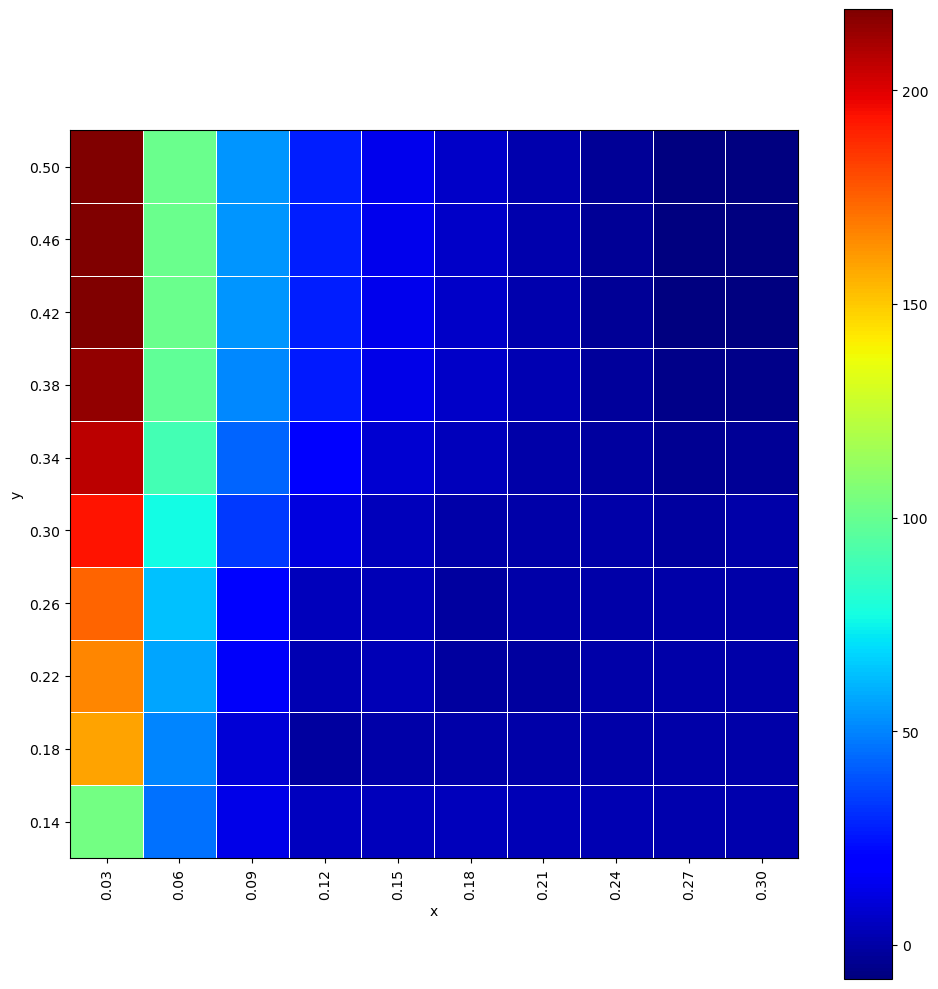

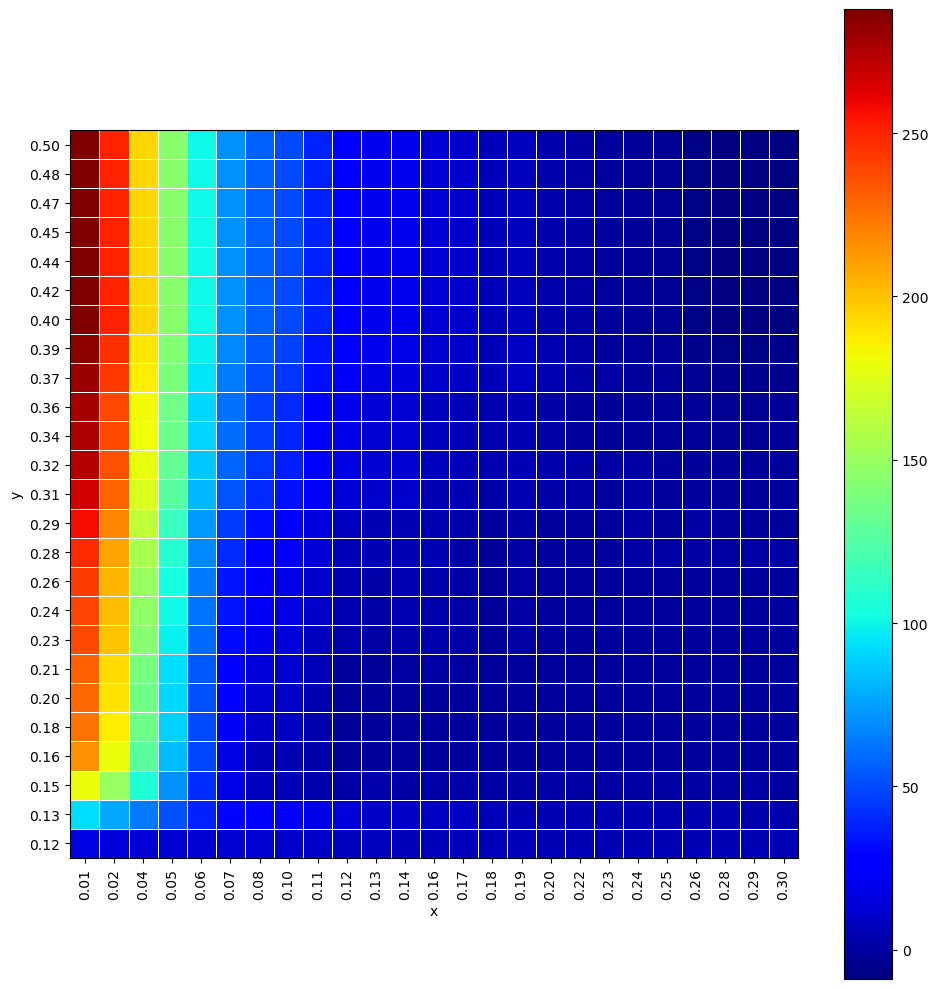

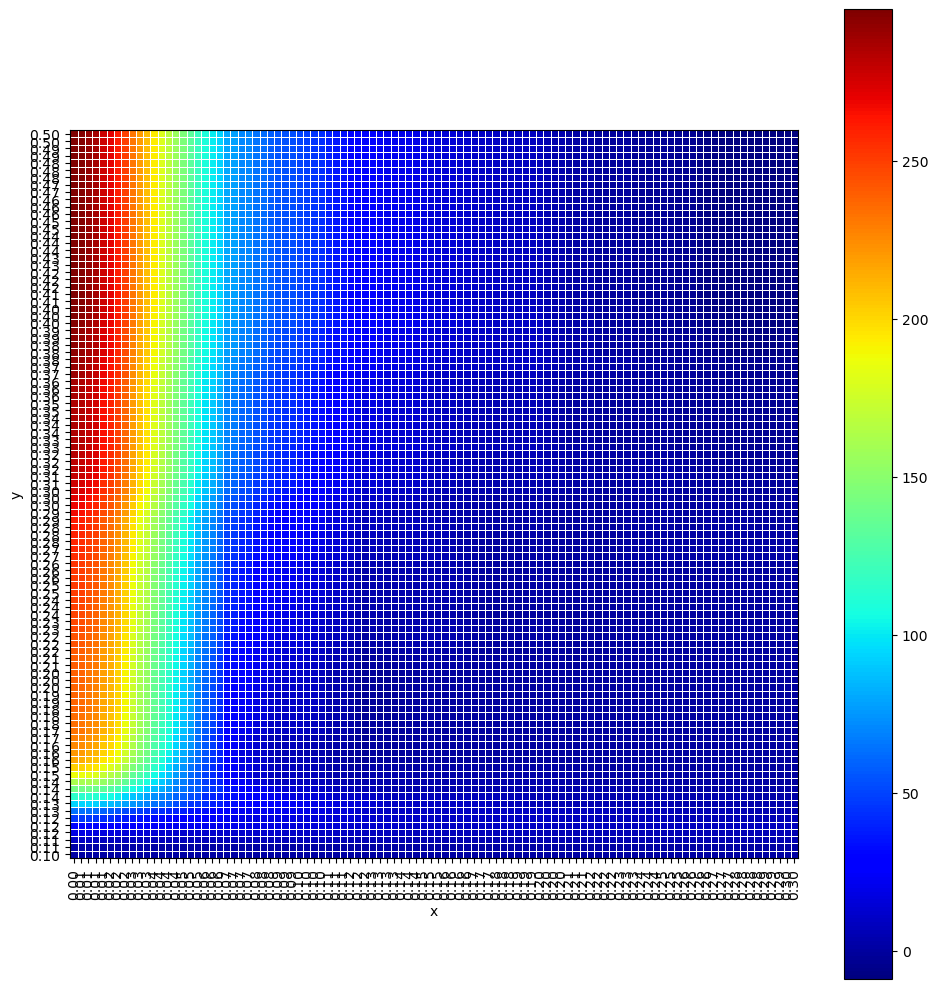

In [48]:
MIN_X = 0.00
MAX_X = 0.30

MIN_Y = 0.1
MAX_Y = 0.5

GRIDSIZES = [(10, 10), (25, 25), (100, 100)]

for GRIDSIZE in GRIDSIZES:

    ## initializing matrix
    M = np.zeros(GRIDSIZE, dtype=int)

    # computing
    for i, x in enumerate(
        np.linspace(start=MAX_X, stop=MIN_X, num=GRIDSIZE[0], endpoint=False)[::-1]
    ):
        for j, y in enumerate(
            np.linspace(start=MAX_Y, stop=MIN_Y, num=GRIDSIZE[1], endpoint=False)[::-1]
        ):
            M[j, i] = EC_at_bifiltration(contributions_list, x, y)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    im = ax.pcolormesh(M, edgecolors="w", linewidth=0.5, cmap="jet")

    ax.set_xlabel("x")
    ax.set_xticks(
        [i + 0.5 for i in range(GRIDSIZE[0])],
        [
            "{:.2f}".format(l)
            for l in np.linspace(
                start=MAX_X, stop=MIN_X, num=GRIDSIZE[0], endpoint=False
            )[::-1]
        ],
        rotation=90,
    )

    ax.set_ylabel("y")
    ax.set_yticks(
        [i + 0.5 for i in range(GRIDSIZE[1])],
        [
            "{:.2f}".format(l)
            for l in np.linspace(
                start=MAX_Y, stop=MIN_Y, num=GRIDSIZE[1], endpoint=False
            )[::-1]
        ],
    )
    plt.colorbar(im, ax=ax)
    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()

    ## save to csv
    np.savetxt(
        "output/300_pts_{}x{}.csv".format(GRIDSIZE[0], GRIDSIZE[1]),
        M.T,
        delimiter=",",
        fmt="%i",
    )

    ## let us also save the coordinates
    np.savetxt(
        "output/300_pts_{}_xgrid.csv".format(GRIDSIZE[0]),
        np.linspace(start=MAX_X, stop=MIN_X, num=GRIDSIZE[0], endpoint=False)[::-1],
        delimiter=",",
        fmt="%10.10f",
    )

    np.savetxt(
        "output/300_pts_{}_ygrid.csv".format(GRIDSIZE[1]),
        np.linspace(start=MAX_Y, stop=MIN_Y, num=GRIDSIZE[1], endpoint=False)[::-1],
        delimiter=",",
        fmt="%10.10f",
    )

## 3dim

In [6]:
contributions_df = pd.read_csv(
    "data/cat_ECP.csv", header=None, sep=" ", names=["R", "G", "B", "c"]
)
contributions_df

,R,G,B,c
0,0,0,0,3
1,0,0,2,1
2,0,1,0,4
3,0,2,0,3
4,0,3,0,2
...,...,...,...,...
37071,255,253,232,1
37072,255,253,241,1
37073,255,254,236,1
37074,255,255,203,1


In [8]:
contributions_list = [((r[0], r[1], r[2]), r[3]) for r in contributions_df.values]
contributions_list[:5]

[((0, 0, 0), 3),
 ((0, 0, 2), 1),
 ((0, 1, 0), 4),
 ((0, 2, 0), 3),
 ((0, 3, 0), 2)]

In [ ]:
MIN_R = 0
MAX_R = 255

GRIDSIZES = [(10, 10, 10), (26, 26, 26), (100, 100, 100)]

for GRIDSIZE in tqdm(GRIDSIZES):

    ## initializing matrix
    M = np.zeros(GRIDSIZE, dtype=int)

    # computing
    for i, r in tqdm(
        enumerate(
            np.linspace(start=MIN_R, stop=MAX_R, num=GRIDSIZE[0], endpoint=False)[::-1]
        )
    ):
        for j, g in enumerate(
            np.linspace(start=MIN_R, stop=MAX_R, num=GRIDSIZE[1], endpoint=False)[::-1]
        ):
            for k, b in enumerate(
                np.linspace(start=MIN_R, stop=MAX_R, num=GRIDSIZE[2], endpoint=False)[
                    ::-1
                ]
            ):
                M[k, j, i] = EC_at_RGB_value(contributions_list, r, g, b)

    with open(
        "output/3d/cat_{}x{}x{}.csv".format(GRIDSIZE[0], GRIDSIZE[1], GRIDSIZE[2]), "w"
    ) as file:
        for i in range(M.shape[0]):
            file.write(f"Layer {i}:\n")
            np.savetxt(file, M[i].T, fmt="%i", delimiter=",")

    # let us also save the coordinates
    for i, c in enumerate(["R", "G", "B"]):
        np.savetxt(
            "output/3d/cat_{}_{}_grid.csv".format(GRIDSIZE[i], c),
            np.linspace(start=MAX_R, stop=MIN_R, num=GRIDSIZE[i], endpoint=False)[::-1],
            delimiter=",",
            fmt="%10.10f",
        )

  0%|          | 0/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]